# Tarea 1 Machine Learning - Métodos Lineales para Regresión

Juan Pablo Muñoz - 201373522-3 

Margarita Bugueño Pérez - 201373510-K

## House Sales in King County, USA

### El dataset y organización del presente

Se trabaja sobre el dataset 'House Sales in King County, USA' el cual contiene los precios de venta de casas para King County, el cual incluye Seattle.  
Los datos incluyen ventas realizadas entre mayo del 2014 y mayo del 2015.  
  
  El trabajo expuesto se organiza de la siguiente manera:  
  i. Regresión Lineal Ordinaria (LSS)  
  ii. Selección de Atributos  
  iii. Regularización  
  iv. Drift


#### Regresión Lineal Ordinaria (LSS) 

###### a. Construya un dataframe con los datos a analizar

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#sns.set(style="ticks", color_codes=True)
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


En el dataset se informan 20 características diferentes de cada una de las casas registradas en él. Estas son:
  
  id: identificador numérico para una casa  
  date: fecha en que la casa fue vendida  
  price: variable objetivo (precio de venta de la casa)  
  bedrooms: #dormitorios
  bathrooms: #baños
  sqft_living: pies cuadrados construidos  
  sqft_lot: pies cuadrados del terreno  
  floors: #pisos  
  waterfront: 0 si no tiene vista a lago/mar, 1 en otro caso  
  view: 0 si no ha sido visitada, 1 en otro caso  
  condition: condición de la casa  
  grade: nota, basado en el sistema de calificación de King County  
  sqft_above: pies cuadrados de la casa sin incluir el sótano  
  sqft_basement: pies cuadrados del sótano  
  yr_built: año de construcción  
  yr_renovated: año de renovación/ampliación de la casa  
  zipcode: código postal  
  lat: latitud (ubicación de la casa)  
  long: longitud (ubicación de la casa)  
  sqft_living15: pies cuadrados construidos en el año 2015  
  sqft_lot15: pies cuadrados del terreno en el año 2015


###### b. Describa brevemente el dataset a utilizar

In [21]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
df.shape

(21613, 21)

Se informa que el dataset contiene 21613 registros diferentes, cada uno con 20 atributos.

Tres de los 20 atributos no representan información de valor cuando se propone evaluar el precio de una propiedad. Estos son: 'id', 'date', 'zipcode' y por ello, se procede a eliminarlos del dataframe.

In [4]:
df.drop(['id','date','zipcode',],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21613, 18)

Se observa que las dimensiones (atributos) pasan a ser 17 efectivamente. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


Se muestra el resumen del dataframe 'df', en el cual no existen registros nulos para ninguna de las 17 características.  
Además se informa el tipo de dato que presenta cada una de los atributos.

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


El método describe genera estadísticas descriptivas del dataframe en cuestión.  
Se informa el valor promedio, dispersión y la forma de la distribución de los datos según atributo (excluyendo los valores de NaN).  


###### ¿Cómo se observan los datos? [Gráfico]

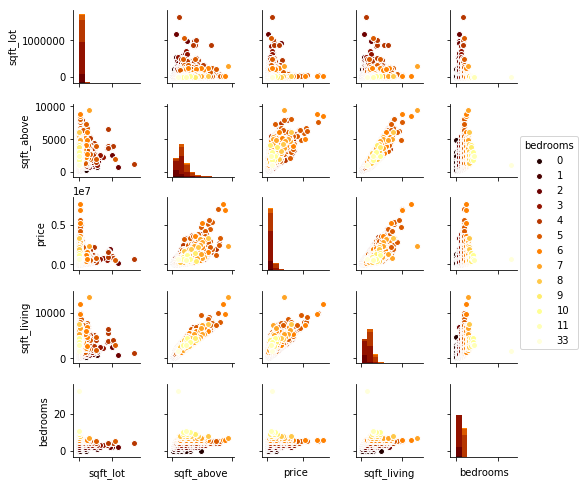

In [27]:
import matplotlib.pyplot as plt
plt.clf()
g = sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], hue='bedrooms', palette='afmhot',size=1.4)
g.set(xticklabels=[])
plt.show()

In [18]:
plt.clf()
g = sns.pairplot(df, x_vars=df[['sqft_lot','sqft_above','sqft_living']], y_vars='price', palette='gray',size=4, aspect=4)
g.set(xticklabels=[])
plt.show()
#'bedrooms', 'bathrooms', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_living', 
#                                'floors', 'waterfront', 'view'


KeyboardInterrupt: 

## HABLAR DE LO QUE SE VE EN EL GRAFICO xd 

###### c. Normalización de los datos y transformación a la variable a predecir 

Antes de escalar, se graficará en un boxplot el precio de las casas:

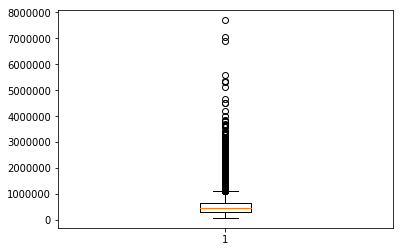

In [25]:
import matplotlib.pyplot as plt

plt.clf()

fig, ax = plt.subplots(1)

ax.boxplot(list(df['price']))

plt.show()


Notar que la distribución de los precios está sesgada hacia aquellos bajos, quedando como outliers aquellas casas de un valor de 1 millón o más aproximadamente.

A continuación se realiza el escalado y estandarización de los datos:

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

StandardScaler hace que, para cada atributo, su media sea cero y su varianza unitaria. Con esto logra que el conjunto de datos se componga de atributos 'bien comportados' aptos para la aplicación efectiva de métodos de aprendizaje automático. Esto es porque dichos métodos y sus elementos se construyen asumiendo que los atributos son variables aleatorias distribuidas de forma normal estándar, ya que así se satisfacen condiciones que benefician la simplicidad y eficiencia de los modelos sin pérdida de generalidad. El no aplicar un escalado y estandarización de los atributos provocaría, con alta probabilidad, un peor desempeño de aprendizaje y predicción. 

Al graficar los precios escalados, se obtiene:

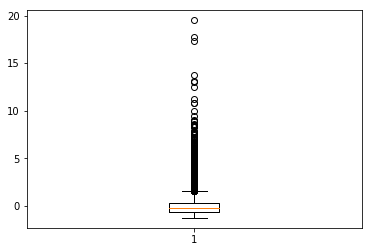

In [27]:
import matplotlib.pyplot as plt

plt.clf()

fig, ax = plt.subplots(1)

ax.boxplot(list(df_scaled['price']))

plt.show()


De lo cual se nota que la distribución, a pesar de estar centrada en el cero y tener varianza unitaria, sigue su sesgo hacia valores pequeños, lo que no es una distribución normal estándar. Aplicar logaritmo a los precios nos entrega sus exponentes en una misma base, los cuales se comportan de una forma más cercana a la distribución normal.

In [28]:
df_scaled['price'] = np.log(df['price'])

Lo que graficado, nos muestra:

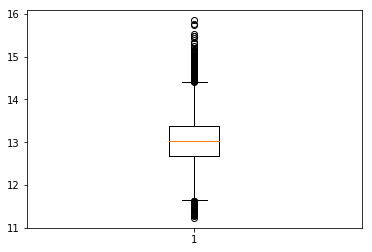

In [29]:
import matplotlib.pyplot as plt

plt.clf()

fig, ax = plt.subplots(1)

ax.boxplot(list(df_scaled['price']))

plt.show()


Esta distribución es más similar a la normal. Además, los datos caen en un intervalo más acotado que escalándolos y estandarizándolos. Por lo tanto, el modelo de regresión lineal resultante de esta representación debería ser mucho más estable cuando el precio de una casa es un outlier demasiado alto.



###### d. Regresión lineal de mínimos cuadrados 

In [30]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

El paso de la línea 4 se hace para agregar el intercepto





deasdasda con el eje de la variable objetivo en la regresion planteada (X\* betha_estimados + betha_0). Así entonces, el coeficiente beta_0 se considera dentro de la matriz de datos X, pasando a tener dimension nx(d+1). con el propósito de simplificar el proceso matemático que llevan a cabo la regresion lineal.  
De no realizar este proceso, el vector correspondiente a los pesos de cada uno de los 17 atributos en cuestion indicaría sólo sdadasad debiendo llevarse a cabo un proceso adicional para determinar el intercepto con el eje Y (precio estimado), que indicaría el precio base de una propiedad.  


Para realizar la regresión lineal, es necesario el vector de datos de los atributos de cada casa ($x^{(i)} \in \mathbb{R}^d$) y su correspondiente precio ($y^{(i)} \in \mathbb{R}$), $\{(x^{(i)}, y^{(i)})\}_{i=1}^{m}$, donde $d$ es la cantidad de atributos de las casas, y $m$ es la cantidad de ejemplos o pares (casa, precio).

###### d. Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable)

Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable). ¿Que variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Que es lo que observa y cuál puede ser la causa?

El z-score del vector predictor $\hat{\beta}$ se define como:


\begin{align}
Z\ score & = \frac{\hat{\beta}}{\sqrt{Var(\hat{\beta})}}
\end{align}

Donde:

\begin{align}
Var(\hat{\beta}) & = \sigma^2(X^T·X)^{-1} \\
\sigma^2 & = \frac{1}{m}\sum_{i}^{m}{(y_i - \hat{y}_i)^2} \\
\end{align}

Y $X$ es la matriz cuyas columnas son los $d$ atributos y cuyas filas son los $m$ ejemplos de entrenamiento. Por último, el vector de predicciones $\hat{y}$ se define como:

\begin{align}
\hat{y} & = X·\hat{\beta}
\end{align}


In [31]:
linreg.coef_.reshape(-1,1)

array([[ -1.01252648e-02],
       [  6.13708997e-02],
       [ -6.62038205e+11],
       [  2.23386456e-02],
       [  3.76395997e-02],
       [  3.34632308e-02],
       [  4.19670532e-02],
       [  4.51256182e-02],
       [  1.85961167e-01],
       [  5.96911425e+11],
       [  3.19020623e+11],
       [ -1.09766644e-01],
       [  1.50190914e-02],
       [  1.86375681e-01],
       [ -4.04495857e-03],
       [  8.58641062e-02],
       [ -7.18043515e-03],
       [  1.30398457e+01]])

###### e. Corrección 

###### f. Error de predicción del modelo mediante validación cruzada 

###### g. Errores de predicción mediante "quantile-quantile plot” 

#### Selección de atributos

## Detectar enfermedades cardíacas

El dataset contiene 13 atributos en lugar de las 75 que se consideran en el dataset original.  
Estas corresponden a:  

-- 1. age       
-- 2. sex       
-- 3. chest pain type  (4 values)       
-- 4. resting blood pressure  
-- 5. serum cholestoral in mg/dl      
-- 6. fasting blood sugar > 120 mg/dl       
-- 7. resting electrocardiographic results  (values 0,1,2) 
-- 8. maximum heart rate achieved  
-- 9. exercise induced angina    
-- 10. oldpeak = ST depression induced by exercise relative to rest   
-- 11. the slope of the peak exercise ST segment     
-- 12. number of major vessels (0-3) colored by flourosopy        
-- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect   